### Actionable Insights: Find that, integrated over time, most exports to low and middle income countries in the Middle East and North Africa come from other countries in that area, even though historically that was not always true. The effects of the rule of Saddam Hussein and Assad also seem fairly clear from this metric

#### Time allocations
#### 1st hour - Investigate data from http://data.worldbank.org/data-catalog/world-development-indicators, make some basic plots looking at the distributions and thinking about the problem
#### 2nd hour - Choose what problem I want to try to solve and start cleaning the data so that I can answer the question I want. Determine if there may be some data external to this set that would be useful
#### 3rd hour - Determine what my story is and make the first write up of my actionable insights
#### 4th hour - Consider more complicated analysis or other questions/insights I might get from the data
#### 5th hour - Finalize plots and insights

In [3]:
import pandas as pd
import seaborn as sns
import numpy
import matplotlib

%matplotlib inline

In [5]:
wdi_data = pd.read_csv('data/WDI_Data.csv')

In [6]:
wdi_data.keys()

Index([u'Country Name', u'Country Code', u'Indicator Name', u'Indicator Code', u'1960', u'1961', u'1962', u'1963', u'1964', u'1965', u'1966', u'1967', u'1968', u'1969', u'1970', u'1971', u'1972', u'1973', u'1974', u'1975', u'1976', u'1977', u'1978', u'1979', u'1980', u'1981', u'1982', u'1983', u'1984', u'1985', u'1986', u'1987', u'1988', u'1989', u'1990', u'1991', u'1992', u'1993', u'1994', u'1995', u'1996', u'1997', u'1998', u'1999', u'2000', u'2001', u'2002', u'2003', u'2004', u'2005', u'2006', u'2007', u'2008', u'2009', u'2010', u'2011', u'2012', u'2013', u'2014', u'2015'], dtype='object')

In [61]:
years = ['1960','1961','1962','1963','1964','1965','1966','1967','1968','1969',
                                            '1970','1971','1972','1973','1974','1975','1976','1977','1978','1979',
                                            '1980','1981','1982','1983','1984','1985','1986','1987','1988','1989',
                                            '1990','1991','1992','1993','1994','1995','1996','1997','1998','1999',
                                            '2000','2001','2002','2003','2004','2005','2006','2007','2008','2009',
                                            '2010','2011','2012','2013','2014','2015']

In [126]:
indicators = wdi_data['Indicator Name'].unique()

In [127]:
print len(indicators),indicators

1410 ['2005 PPP conversion factor, GDP (LCU per international $)'
 '2005 PPP conversion factor, private consumption (LCU per international $)'
 'Access to electricity (% of population)' ...,
 'Women who were first married by age 18 (% of women ages 20-24)'
 "Women's share of population ages 15+ living with HIV (%)"
 'Youth literacy rate, population 15-24 years, both sexes (%)']


In [128]:
female_indicators = [i for i in indicators if(('Woman' in i) or ('woman' in i) or ('Women' in i) or ('women' in i) \
                     or ('female' in i) or ('Female' in i))]

In [129]:
male_indicators = [i for i in indicators if((' Man' in i) or (' man ' in i) or (' Men' in i) or (' men' in i) \
                     or (' male' in i) or (' Male' in i))]

In [130]:
print len(female_indicators),female_indicators

125 ['Account at a financial institution, female (% age 15+) [ts]', 'Adjusted net enrollment rate, primary, female (% of primary school age children)', 'Adolescent fertility rate (births per 1,000 women ages 15-19)', 'Adolescents out of school, female (% of female lower secondary school age)', 'Average working hours of children, study and work, female, ages 7-14 (hours per week)', 'Average working hours of children, working only, female, ages 7-14 (hours per week)', 'Child employment in agriculture, female (% of female economically active children ages 7-14)', 'Child employment in manufacturing, female (% of female economically active children ages 7-14)', 'Child employment in services, female (% of female economically active children ages 7-14)', 'Children in employment, female (% of female children ages 7-14)', 'Children in employment, self-employed, female (% of female children in employment, ages 7-14)', 'Children in employment, study and work, female (% of female children in emplo

In [131]:
print len(male_indicators),male_indicators

88 ['Account at a financial institution, male (% age 15+) [ts]', 'Adjusted net enrollment rate, primary, male (% of primary school age children)', 'Adolescents out of school, male (% of male lower secondary school age)', 'Average working hours of children, study and work, male, ages 7-14 (hours per week)', 'Average working hours of children, working only, male, ages 7-14 (hours per week)', 'Child employment in agriculture, male (% of male economically active children ages 7-14)', 'Child employment in manufacturing, male (% of male economically active children ages 7-14)', 'Child employment in services, male (% of male economically active children ages 7-14)', 'Children in employment, male (% of male children ages 7-14)', 'Children in employment, self-employed, male (% of male children in employment, ages 7-14)', 'Children in employment, study and work, male (% of male children in employment, ages 7-14)', 'Children in employment, unpaid family workers, male (% of male children in employ

In [132]:
from sklearn.feature_extraction.text import CountVectorizer
import re
clean_indicators = [re.sub("[^a-zA-Z]"," ",j).lower() for j in indicators]
wdi_vectorizer = CountVectorizer(stop_words='english',max_features=200)
wdi_wordcounts = wdi_vectorizer.fit_transform(clean_indicators)

In [133]:
word_freqs = zip(numpy.asarray(wdi_wordcounts.sum(axis=0)).ravel(),wdi_vectorizer.get_feature_names())
word_freqs.sort(reverse=True)

In [125]:
print word_freqs

[(381, u'current'), (207, u'total'), (139, u'female'), (133, u'net'), (122, u'male'), (100, u'population'), (100, u'employment'), (99, u'debt'), (93, u'ages'), (92, u'rate'), (92, u'ppg'), (88, u'children'), (87, u'primary'), (86, u'lcu'), (86, u'expenditure'), (86, u'education'), (83, u'gdp'), (74, u'exports'), (67, u'external'), (65, u'services'), (65, u'income'), (64, u'constant'), (60, u'imports'), (59, u'merchandise'), (57, u'flows'), (56, u'secondary'), (54, u'labor'), (54, u'gross'), (54, u'consumption'), (50, u'private'), (48, u'force'), (48, u'estimate'), (47, u'low'), (46, u'value'), (45, u'age'), (44, u'ratio'), (44, u'bilateral'), (43, u'official'), (42, u'goods'), (41, u'national'), (41, u'bop'), (37, u'unemployment'), (36, u'school'), (36, u'emissions'), (36, u'creditors'), (36, u'capita'), (35, u'service'), (35, u'gni'), (35, u'annual'), (35, u'added'), (34, u'high'), (34, u'commercial'), (34, u'aid'), (33, u'international'), (32, u'savings'), (32, u'final'), (31, u'publ

In [136]:
ag_indicators = [i for i in indicators if('agricult' in i.lower())]

In [138]:
print len(ag_indicators),ag_indicators

29 ['Agricultural irrigated land (% of total agricultural land)', 'Agricultural land (% of land area)', 'Agricultural land (sq. km)', 'Agricultural machinery, tractors', 'Agricultural machinery, tractors per 100 sq. km of arable land', 'Agricultural methane emissions (% of total)', 'Agricultural methane emissions (thousand metric tons of CO2 equivalent)', 'Agricultural nitrous oxide emissions (% of total)', 'Agricultural nitrous oxide emissions (thousand metric tons of CO2 equivalent)', 'Agricultural raw materials exports (% of merchandise exports)', 'Agricultural raw materials imports (% of merchandise imports)', 'Agriculture value added per worker (constant 2010 US$)', 'Agriculture, value added (% of GDP)', 'Agriculture, value added (annual % growth)', 'Agriculture, value added (constant 2010 US$)', 'Agriculture, value added (constant LCU)', 'Agriculture, value added (current LCU)', 'Agriculture, value added (current US$)', 'Annual freshwater withdrawals, agriculture (% of total fres

In [139]:
energy_indicators = [i for i in indicators if(('oil' in i.lower()) or ('electricity' in i.lower()) or \
                                              ('gas' in i.lower()) or ('fuel' in i.lower()))]

In [146]:
print len(energy_indicators),energy_indicators

46 ['Access to electricity (% of population)', 'Access to electricity, rural (% of rural population)', 'Access to electricity, urban (% of urban population)', 'Access to non-solid fuel (% of population)', 'Access to non-solid fuel, rural (% of rural population)', 'Access to non-solid fuel, urban (% of urban population)', 'CO2 emissions from electricity and heat production, total (% of total fuel combustion)', 'CO2 emissions from gaseous fuel consumption (% of total)', 'CO2 emissions from gaseous fuel consumption (kt)', 'CO2 emissions from liquid fuel consumption (% of total)', 'CO2 emissions from liquid fuel consumption (kt)', 'CO2 emissions from manufacturing industries and construction (% of total fuel combustion)', 'CO2 emissions from other sectors, excluding residential buildings and commercial and public services (% of total fuel combustion)', 'CO2 emissions from residential buildings and commercial and public services (% of total fuel combustion)', 'CO2 emissions from solid fuel 

In [154]:
trade_manufact_indicators = [i for i in indicators if(('export' in i.lower()) or ('import' in i.lower()) \
                                             or ('tariff' in i.lower()) or ('merchandise' in i.lower())) \
                                             or('manufact' in i.lower())]

In [155]:
print len(trade_indicators),trade_indicators

131 ['Agricultural raw materials exports (% of merchandise exports)', 'Agricultural raw materials imports (% of merchandise imports)', 'Arms exports (SIPRI trend indicator values)', 'Arms imports (SIPRI trend indicator values)', 'Average time to clear exports through customs (days)', 'Commercial service exports (current US$)', 'Commercial service imports (current US$)', 'Communications, computer, etc. (% of service exports, BoP)', 'Communications, computer, etc. (% of service imports, BoP)', 'Computer, communications and other services (% of commercial service exports)', 'Computer, communications and other services (% of commercial service imports)', 'Cost to export (US$ per container)', 'Cost to import (US$ per container)', 'Customs and other import duties (% of tax revenue)', 'Customs and other import duties (current LCU)', 'Debt service (PPG and IMF only, % of exports of goods, services and primary income)', 'Documents to export (number)', 'Documents to import (number)', 'Energy imp

#### Indicators that I find kind of interesting in a first pass through the data: 'Merchandise imports from economies in the Arab World (% of total merchandise imports)', 'Merchandise exports to low- and middle-income economies in Middle East & North Africa (% of total merchandise exports)', 'Nonpregnant and nonnursing women can do the same jobs as men (1=yes; 0=no)','Condom use, population ages 15-24, male (% of males ages 15-24)','Employment in agriculture (% of total employment)','Total greenhouse gas emissions (kt of CO2 equivalent)','Arms imports (SIPRI trend indicator values)','Food imports (% of merchandise imports)',

In [161]:
me_na_exports = wdi_data[wdi_data['Indicator Name']==\
         'Merchandise exports to low- and middle-income economies in Middle East & North Africa (% of total merchandise exports)']

In [196]:
#See that 2015 is missing for this dataset so I just remove it from years
me_na_export_values = me_na_exports[years[:-1]].transpose()
me_na_export_countries = me_na_exports['Country Name']

In [239]:
print len(me_na_export_values.isnull().values)

55


In [220]:
me_na_export_int = me_na_export_values.apply(pd.Series.interpolate)

In [246]:
me_na_export_int.isnull().values.any()

True

In [227]:
me_na_export_bfill = me_na_export_values.bfill()

In [247]:
me_na_export_bfill.isnull().values.any()

True

In [240]:
me_na_export_new=me_na_export_bfill.dropna(axis=1,how='all')

In [248]:
me_na_export_new.isnull().values.any()

False

In [249]:
me_na_export_values.columns = list(me_na_export_countries)
arab_exports = me_na_export_values['Arab World']

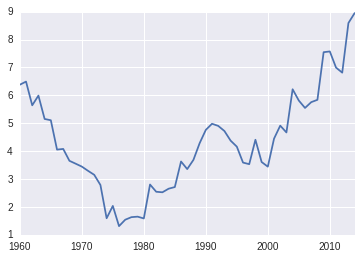

In [250]:
arab_exports.plot()

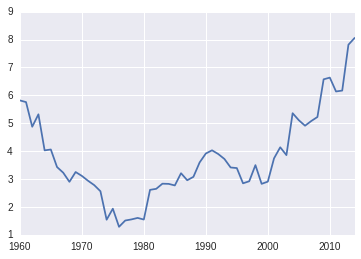

In [256]:
me_na_export_new['Middle East & North Africa'].plot()

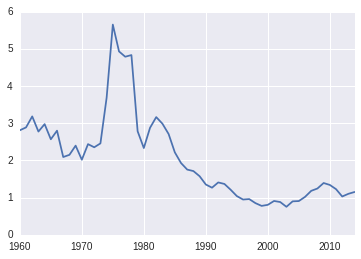

In [258]:
me_na_export_new['United States'].plot()

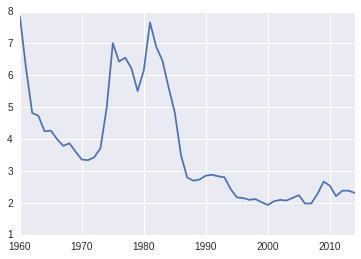

In [264]:
me_na_export_new['Euro area'].plot()

In [265]:
basic_stats = me_na_export_new.describe(percentiles=[0,.68,.95,.999])

In [276]:
country_means = [(basic_stats[k].mean(),k) for k in basic_stats.keys()]

In [280]:
country_means.sort(reverse=True)
print country_means[:20]

[(39.505469180130248, 'Iraq'), (34.562203651320331, 'Syrian Arab Republic'), (31.950070228864785, 'Jordan'), (27.021942119997796, 'Lebanon'), (22.393436621069306, 'Turkey'), (22.026190052575544, 'Ethiopia'), (21.18457787562906, 'Cyprus'), (20.840358074919699, 'Azerbaijan'), (20.405770592567116, 'Djibouti'), (20.213491725996825, 'Somalia'), (20.161395073290276, 'Benin'), (19.37456769522618, 'Central African Republic'), (19.020360718160582, 'Armenia'), (17.70378278855339, 'Cabo Verde'), (16.069452349412483, 'Europe & Central Asia (excluding high income)'), (16.001710117434477, 'Cambodia'), (15.654822528557014, 'Cuba'), (14.355688679638238, 'Romania'), (14.338381086216771, 'Egypt, Arab Rep.'), (14.291326683252411, 'France')]


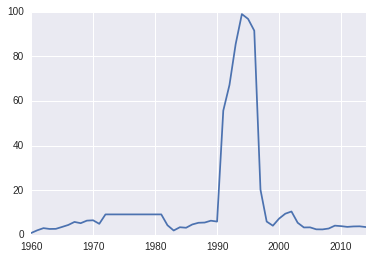

In [281]:
me_na_export_new['Iraq'].plot()

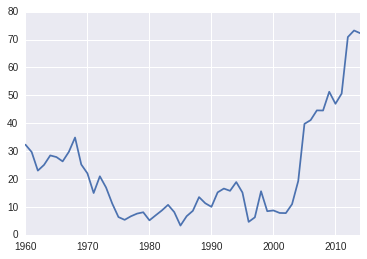

In [282]:
me_na_export_new['Syrian Arab Republic'].plot()

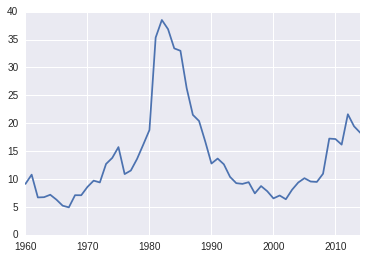

In [285]:
me_na_export_new['Turkey'].plot()

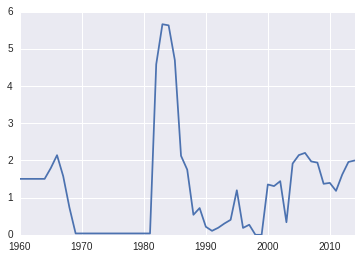

In [290]:
me_na_export_new['Iran, Islamic Rep.'].plot()

#### Actual time usage
#### 1st hour - Tried to think about useful ways to consider all the different indicator names. At first I tried counting them based on country or year and realized the data is just two large. I investigated the distribution of gender classifiers, which seemed to make up a large proportion of the indicators. Finally I settled on using a word count vectorizer to try to determine what the most common topics were. 
#### 2nd hour - Found a few interesting topics in the most common word list (male and female turned up as expected, but also found agriculture, trade/manufacturing and energy). Looked through the indicators in these topics to find the ones I thought were most interesting. Then started selecting these indicators in pandas and getting their year and country information.
#### 3rd hour - Spend a lot of time learning new fun things to do with pandas (how to get mean, median etc from describe(), how to use info(), how to find NaN values and some different ways to impute them or remove them). Look at indicator 'Merchandise exports to low- and middle-income economies in Middle East & North Africa (% of total merchandise exports)'. Find that historically US and Europe used to be dominant trade partners, but integrated over time most of the trade partners are other countries in the Middle East and North Africa. Also see spikes in Iraq and Syria corresponding to rule of tyrannical dictators (Hussein (who began his rule in 1979 but was embroiled in a war in Iran from about 1980-1990, which also seems to have caused a spike for Iran), Assad in 2000 and Erdogan in 2003) that in several cases almost immediately precluded major wars (Iraq and Syrian wars)